# Dataset Description

1. TV: Represents the advertising budget spent on TV advertisements.
2. Radio: Represents the advertising budget spent on radio advertisements.
3. Newspaper: Represents the advertising budget spent on newspaper advertisements.
4. Sales: Represents the sales generated as a result of the advertising efforts.

In [157]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [13]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [14]:
df.shape

(200, 4)

# Univariate Analysis

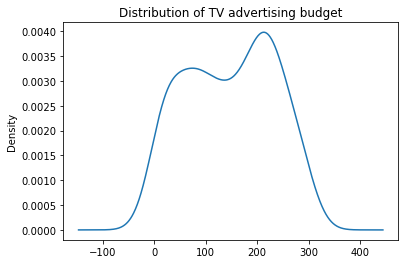

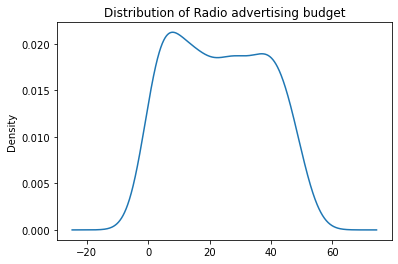

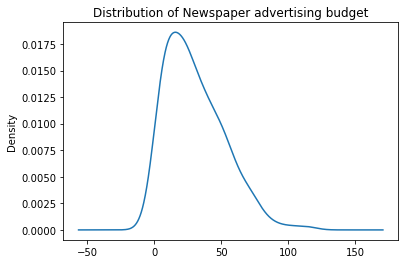

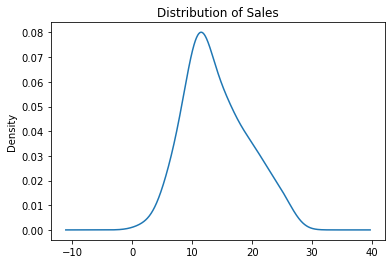

In [22]:
df['TV'].plot(kind='kde')
plt.title('Distribution of TV advertising budget')
plt.show()

df['Radio'].plot(kind='kde')
plt.title('Distribution of Radio advertising budget')
plt.show()

df['Newspaper'].plot(kind='kde')
plt.title('Distribution of Newspaper advertising budget')
plt.show()

df['Sales'].plot(kind='kde')
plt.title('Distribution of Sales')
plt.show()

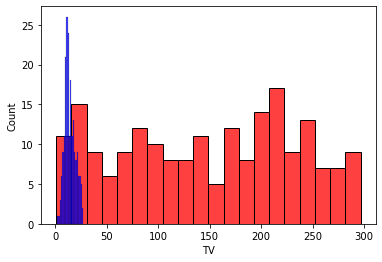

In [27]:
sns.histplot(df['TV'],bins=20,color='red')
sns.histplot(df['Sales'],bins=20,color='blue')
plt.show()

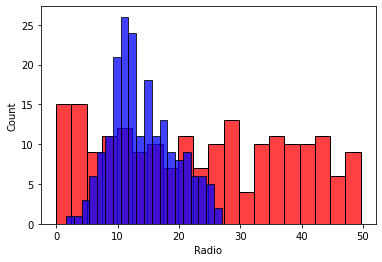

In [28]:
sns.histplot(df['Radio'],bins=20,color='red')
sns.histplot(df['Sales'],bins=20,color='blue')
plt.show()

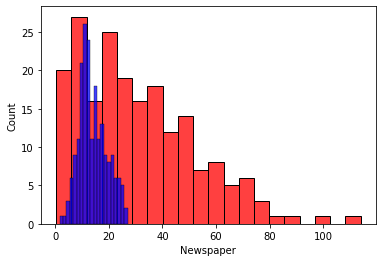

In [29]:
sns.histplot(df['Newspaper'],bins=20,color='red')
sns.histplot(df['Sales'],bins=20,color='blue')
plt.show()

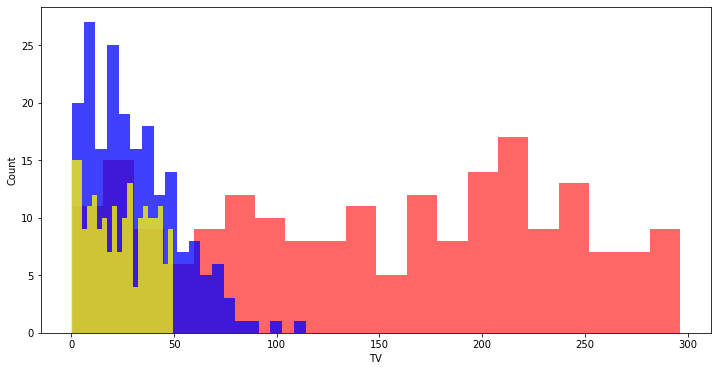

In [43]:
plt.figure(figsize=(12,6))
sns.histplot(df['TV'],bins=20,color='red',alpha=0.6,edgecolor=None)
sns.histplot(df['Newspaper'],bins=20,color='blue',edgecolor=None)
sns.histplot(df['Radio'],bins=20,color='yellow',edgecolor=None)
plt.show()

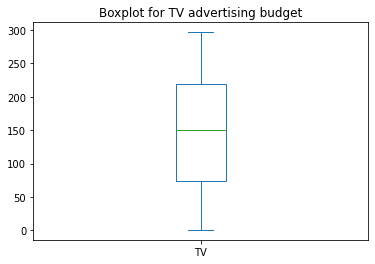

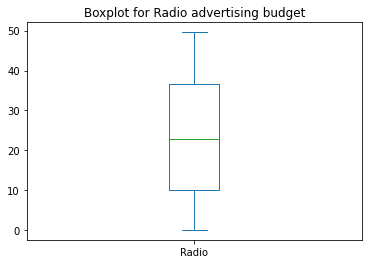

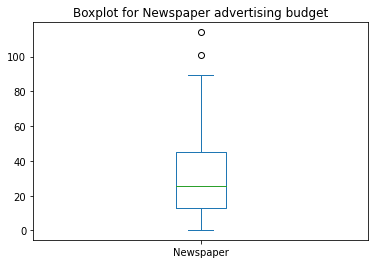

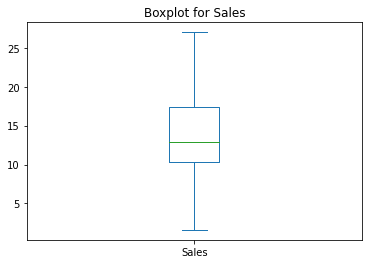

In [71]:
df['TV'].plot(kind='box')
plt.title('Boxplot for TV advertising budget')
plt.show()

df['Radio'].plot(kind='box')
plt.title('Boxplot for Radio advertising budget')
plt.show()

df['Newspaper'].plot(kind='box')
plt.title('Boxplot for Newspaper advertising budget')
plt.show()

df['Sales'].plot(kind='box')
plt.title('Boxplot for Sales')
plt.show()

# Multivariate Analysis

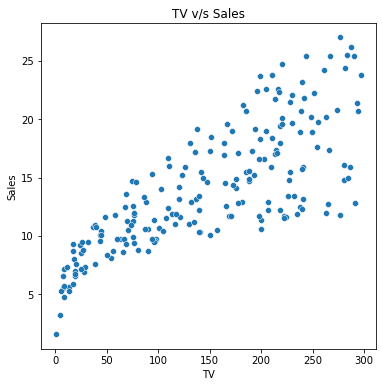

In [51]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df,x=df['TV'],y=df['Sales'])
plt.title('TV v/s Sales')
plt.show()

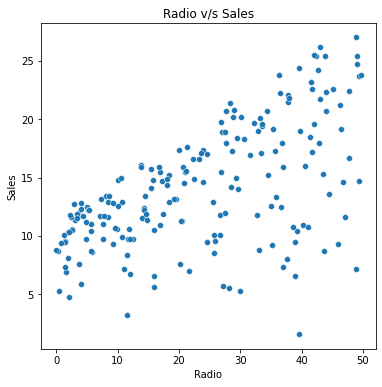

In [52]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df,x=df['Radio'],y=df['Sales'])
plt.title('Radio v/s Sales')
plt.show()

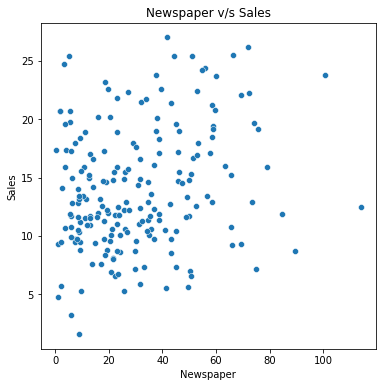

In [53]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df,x=df['Newspaper'],y=df['Sales'])
plt.title('Newspaper v/s Sales')
plt.show()

<AxesSubplot:>

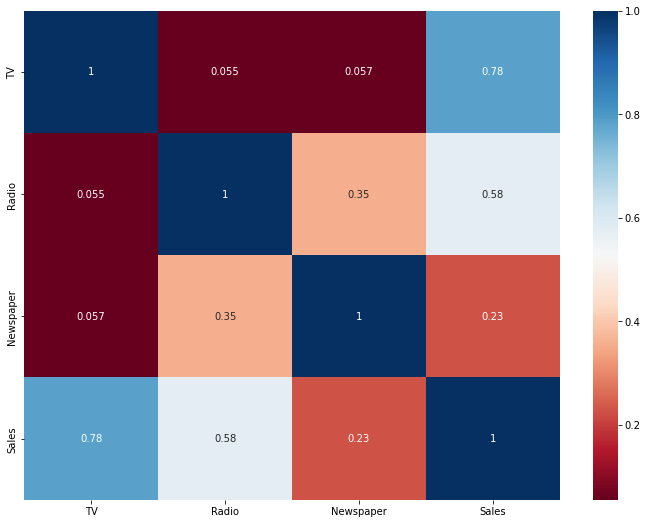

In [70]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')

# Model Building 

In [159]:
X = df.drop('Sales',axis=1)
y = df['Sales']

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Linear Regression

In [161]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred = linear_regression.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Linear Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

Linear Regression Root Mean Squared Error: 1.9485372043446378
R Squared: 0.8609466508230369


### Ridge Regression

In [162]:
ridge_regression = Ridge()
ridge_regression.fit(X_train, y_train)
y_pred = ridge_regression.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Ridge Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

Ridge Regression Root Mean Squared Error: 1.9485101675619174
R Squared: 0.8609505096450262


### Laso Regression

In [163]:
lasso_regression = Lasso()
lasso_regression.fit(X_train, y_train)
y_pred = lasso_regression.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Lasso Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

Lasso Regression Root Mean Squared Error: 1.9188635087516304
R Squared: 0.8651496069722558


### Elastic Net Regression

In [164]:
elastic_net_regression = ElasticNet()
elastic_net_regression.fit(X_train, y_train)
y_pred = elastic_net_regression.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("ElasticNet Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

ElasticNet Regression Root Mean Squared Error: 1.931580157206125
R Squared: 0.863356329519012


### Decision Tree Regression

In [165]:
decision_tree_regression = DecisionTreeRegressor()
decision_tree_regression.fit(X_train, y_train)
y_pred = decision_tree_regression.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Decision Tree Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

Decision Tree Regression Root Mean Squared Error: 1.3443089922583527
R Squared: 0.9338145911267115


### Random Forest Regression

In [166]:
random_forest_regression = RandomForestRegressor(random_state=2)
random_forest_regression.fit(X_train, y_train)
y_pred = random_forest_regression.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Random Forest Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

Random Forest Regression Root Mean Squared Error: 0.7229422060810483
R Squared: 0.9808587097477135


### Gradient Boosting Regression

In [167]:
gradient_boosting_regression = GradientBoostingRegressor()
gradient_boosting_regression.fit(X_train, y_train)
y_pred = gradient_boosting_regression.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Gradient Boosting Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

Gradient Boosting Regression Root Mean Squared Error: 0.7777354453385666
R Squared: 0.9778472404529036


### SVR

In [168]:
svr_regression = SVR()
svr_regression.fit(X_train, y_train)
y_pred = svr_regression.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Support Vector Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

Support Vector Regression Root Mean Squared Error: 2.0894996803880774
R Squared: 0.8400999252198803


### MLPRegressor

In [169]:
mlp_regression = MLPRegressor()
mlp_regression.fit(X_train, y_train)
y_pred = mlp_regression.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("MLP Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

MLP Regression Root Mean Squared Error: 2.2917615752945575
R Squared: 0.8076452497000381


# Model Building after Scaling

In [170]:
X = df.drop('Sales',axis=1)
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [171]:
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression

In [172]:
linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled, y_train)
y_pred = linear_regression.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Linear Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

Linear Regression Root Mean Squared Error: 1.9485372043446385
R Squared: 0.8609466508230368


### Ridge Regression

In [173]:
ridge_regression = Ridge()
ridge_regression.fit(X_train_scaled, y_train)
y_pred = ridge_regression.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Ridge Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

Ridge Regression Root Mean Squared Error: 1.949405680710796
R Squared: 0.8608226691408616


### Lasso Regression

In [174]:
lasso_regression = Lasso()
lasso_regression.fit(X_train_scaled, y_train)
y_pred = lasso_regression.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Lasso Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

Lasso Regression Root Mean Squared Error: 2.303695315857489
R Squared: 0.8056367612559759


### Elastic Net Regression

In [175]:
elastic_net_regression = ElasticNet()
elastic_net_regression.fit(X_train_scaled, y_train)
y_pred = elastic_net_regression.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("ElasticNet Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

ElasticNet Regression Root Mean Squared Error: 2.8130274577970997
R Squared: 0.71019091789498


### Decision Tree Regression

In [176]:
decision_tree_regression = DecisionTreeRegressor()
decision_tree_regression.fit(X_train_scaled, y_train)
y_pred = decision_tree_regression.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Decision Tree Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

Decision Tree Regression Root Mean Squared Error: 1.4045758553148113
R Squared: 0.9277472392480757


### Random Forest Regression

In [177]:
random_forest_regression = RandomForestRegressor()
random_forest_regression.fit(X_train_scaled, y_train)
y_pred = random_forest_regression.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Random Forest Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

Random Forest Regression Root Mean Squared Error: 0.6695276444379787
R Squared: 0.9835827248941188


### Gradient Boosting Regression

In [178]:
gradient_boosting_regression = GradientBoostingRegressor()
gradient_boosting_regression.fit(X_train_scaled, y_train)
y_pred = gradient_boosting_regression.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Gradient Boosting Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

Gradient Boosting Regression Root Mean Squared Error: 0.7306725884314085
R Squared: 0.980447167563532


### SVR

In [179]:
svr_regression = SVR()
svr_regression.fit(X_train_scaled, y_train)
y_pred = svr_regression.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Support Vector Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

Support Vector Regression Root Mean Squared Error: 1.7796594494573277
R Squared: 0.8840053767709141


### MLPRegressor

In [182]:
mlp_regression = MLPRegressor()
mlp_regression.fit(X_train_scaled, y_train)
y_pred = mlp_regression.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("MLP Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

MLP Regression Root Mean Squared Error: 6.275251155158421
R Squared: -0.442202597436407


Random Forest after Scaling gave best results

# Feature Importance

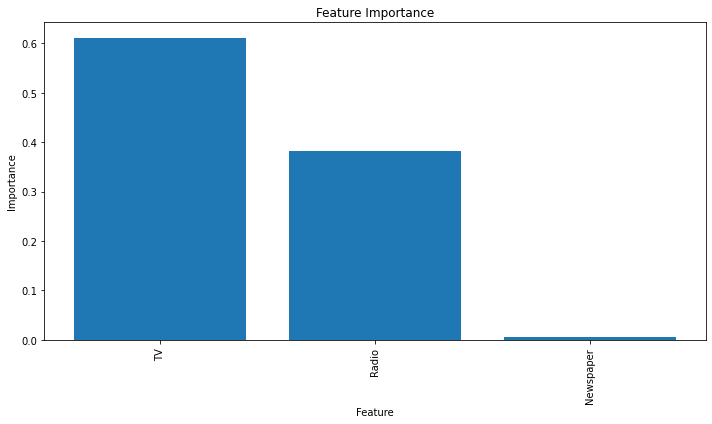

In [183]:
X=df.drop('Sales',axis=1)
y=df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Create a Random Forest regressor
rf = RandomForestRegressor()

# Fit the model
rf.fit(X_train, y_train)

# Get the feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Extract the feature names
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices])
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


# Pipeline Workflow

In [158]:
# Split the data into features (X) and target variable (y)
X = df.drop('Sales', axis=1)
y = df['Sales']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Create a pipeline for the complete process
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print("Random Forest Regression Root Mean Squared Error:", rmse)
print("R Squared:", r2)

Random Forest Regression Root Mean Squared Error: 0.690987337076448
R Squared: 0.9825134462955428
